In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [93]:
# Dataset
x = np.array([-3, -2, -1, 0, 1, 2, 3])
y = np.array([-27, -8, -1, -8, 1, 8, 27])

In [94]:
# W
def calcul_w(x, y, degree=1):
    som, w = list(), list()
    for j in range(degree + 1):
        for i in range(len(x)):  # or len(y)
            som.append(y[i] * (x[i] ** j))
        w.append(sum(som))
        som.clear()
    w = np.reshape(w, (len(w), 1))
    return w

In [95]:
# S
def calcul_s(x, y, degree=1):
    som, s_j = list(), list()
    for j in range((degree + 1) * 2):
        for i in x:
            som.append(i**j)
        s_j.append(sum(som))
        som.clear()
    s = np.zeros((degree + 1, degree + 1))
    for i in range(degree + 1):
        indice = i
        for j in range(degree + 1):
            s[i][j] = s_j[indice]
            indice += 1
    return s

In [96]:
# C = (c0, c1, c2, c3, ...)
def calcul_c(s, w):
    return np.linalg.inv(s).dot(w).T[0]

In [97]:
# calcul de la valeur en un point du modèle
def reg_poly(c, x):
    som = list()
    for i, j in enumerate(c):
        som.append(j * (x**i))
    return sum(som)

In [98]:
# fonction coût
def cost(x, y, c):
    som = list()
    for i in range(len(x)):
        som.append((reg_poly(c, x[i]) - y[i]) ** 2)
    return sum(som) / (2 * len(x))

In [99]:
def calcul_degree(y):
    tendance = None
    changements = 0

    for i in range(1, len(y)):
        if y[i] > y[i - 1]:
            nouvelle_tendance = "monte"
        elif y[i] < y[i - 1]:
            nouvelle_tendance = "descend"
        else:
            continue

        if tendance and nouvelle_tendance != tendance:
            changements += 1
        tendance = nouvelle_tendance

    return changements + 1

In [100]:
degree = calcul_degree(y)
s = calcul_s(x, y, degree)
w = calcul_w(x, y, degree)
c = calcul_c(s, w)

In [101]:
print(f"Coût de la régression : {cost(x, y, c):.4f}")

Coût de la régression : 3.0476


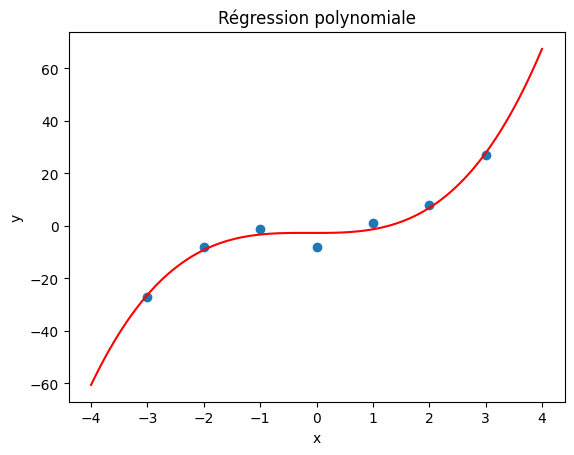

In [102]:
x_reg, y_reg = np.linspace(min(x) - 1, max(x) + 1, 100), list()
for i in x_reg:
    y_reg.append(reg_poly(c, i))

plt.scatter(x, y, label="Données")
plt.plot(
    x_reg,
    y_reg,
    label=f"Tendance dégrée : {degree}",
    color="red",
)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Régression polynomiale")
plt.show()

In [103]:
# Prédiction
point = 10
predict = reg_poly(c, point)
print(f"La prédiction pour le point {point} est : {predict}")

La prédiction pour le point 10 est : 1035.4285714285716
